In [1]:
import ipywidgets as widgets
from dokusu import *
import numpy as np
import time
from IPython.display import display

In [2]:
# sudoku = Sudoku.sample()
sudoku = Sudoku.from_file('sample_puzzles/hard2.csv')
sudoku

7 □ 1  □ 3 □  □ □ □
□ 8 □  7 □ 6  □ □ □
□ □ 3  □ 5 □  9 □ □

□ □ □  4 □ 2  □ 9 □
□ □ □  □ 7 □  1 □ 5
□ □ □  □ □ 5  □ 8 □

1 □ □  □ □ □  3 □ 9
□ 3 □  □ □ □  □ 6 □
9 □ 5  □ □ □  □ □ 1

In [3]:
%%time
sudoku.solve()

CPU times: user 77.9 ms, sys: 150 µs, total: 78.1 ms
Wall time: 77.6 ms


7 2 1  9 3 4  6 5 8
5 8 9  7 2 6  4 1 3
4 6 3  8 5 1  9 7 2

3 5 8  4 1 2  7 9 6
2 9 4  6 7 8  1 3 5
6 1 7  3 9 5  2 8 4

1 4 6  5 8 7  3 2 9
8 3 2  1 4 9  5 6 7
9 7 5  2 6 3  8 4 1

In [4]:
# %%timeit
# sudoku.reset()
# sudoku.solve()

In [5]:
cages = [
    KillerCageRule([(1, 0), (2, 0), (2, 1), (3, 0)], 23),
    KillerCageRule([(4, 0), (4, 1), (3, 1), (5, 1)], 28),
    KillerCageRule([(5, 0), (6, 0), (7, 0), (6, 1)], 12),
    KillerCageRule([(7, 2), (8, 2), (8, 1), (8, 3)], 13),
    KillerCageRule([(3, 2), (4, 2), (5, 2), (4, 3)], 10),
    KillerCageRule([(0, 1), (0, 2), (0, 3), (1, 2)], 24),
    KillerCageRule([(0, 5), (0, 6), (0, 7), (1, 6)], 10),
    KillerCageRule([(1, 8), (2, 8), (2, 7), (3, 8)], 19),
    KillerCageRule([(4, 8), (4, 7), (5, 7), (3, 7)], 30),
    KillerCageRule([(7, 8), (6, 8), (5, 8), (6, 7)], 11),
    KillerCageRule([(7, 6), (8, 6), (8, 7), (8, 5)], 16),
    KillerCageRule([(7, 4), (5, 4), (6, 4), (6, 5)], 23),
    KillerCageRule([(3, 6), (4, 6), (5, 6), (4, 5)], 11),
    KillerCageRule([(1, 4), (2, 4), (3, 4), (2, 3)], 11),
]

In [18]:
%%html
<style>
.cell-small > .jp-OutputArea > .jp-OutputArea-child > .jp-OutputArea-output > pre  {
    font-size: 9px !important;
    color: #888888;
    text-align: center;
}
.cell {
    border: 1px solid gray;
    margin: auto;
    height: 35px;
    width: 35px;
}
.cell-large > .jp-OutputArea > .jp-OutputArea-child > .jp-OutputArea-output > pre {
    font-size: 27px !important;
    text-align: center;
}
.cell-guess {
 // background-color: #000055 !important;
    border: 1px solid white !important;
}
.cell-yellow {
    background-color: #806A00;
}
</style>

In [19]:
def create_cell_output(i):
    out = widgets.Output(
        outputs=({'output_type': 'display_data', 'data': {'text/plain': ''}},)
    )
    out.add_class('cell')
    out.add_class(f'cell-{i}')
    return out

In [20]:
def cell_outputs():
    return [create_cell_output(i) for i in range(9*9)]

In [23]:
def cell_update(sudoku, cell, guess=False):
    cell = tuple(cell)
    out = cell_grid[cell]
    if guess:
        cell_grid[cell].add_class('cell-guess')
    else:
        cell_grid[cell].remove_class('cell-guess')
    
    if sudoku.board[cell] > 0:
        out.outputs = ({'output_type': 'display_data', 'data': {'text/plain': f'{sudoku.board[cell]}'}},)
        out.add_class('cell-large')
        out.remove_class('cell-small')
        return
    
    numbers = np.arange(1, 10) * sudoku.possibilities[cell]
    a = [num if num > 0 else ' ' for num in numbers]
    out.remove_class('cell-large')
    out.add_class('cell-small')
    out.outputs=({
        'output_type': 'display_data',
        'data': {'text/plain': f'{a[0]}{a[1]}{a[2]}\n{a[3]}{a[4]}{a[5]}\n{a[6]}{a[7]}{a[8]}'}
    },)

In [24]:
layout = widgets.Layout(grid_template_columns='1fr '*3, width='365px', border="1px solid gray")
cells = cell_outputs()
cell_grid = np.array([cells[9*i:9*(i+1)] for i in range(9)])

block_layout = widgets.Layout(grid_template_columns='1fr '*3, width='121px', height='121px', border="2px solid white")
def block_slice(i, bs=3):
    y, x = i//bs, i%bs
    return slice(bs*y, bs*(y+1)), slice(bs*x, bs*(x+1))
cell_blocks = [
    widgets.GridBox(list(cell_grid[block_slice(i)].flat), layout=block_layout)
    for i in range(9)
]

sudoku_grid = widgets.GridBox(cell_blocks, layout=layout)

In [69]:
from IPython.display import HTML

np.random.seed(12)

colors = {}
for cage in cages:
    
    a, b, c = np.random.randint(10, 100, 3)
    colors[cage.sum] = f'#{a:02x}{b:02x}{c:02x}'
    
outputs = []
styles = ''
for sum, color in colors.items():
    out = widgets.Output(
        outputs=({'output_type': 'display_data', 'data': {'text/plain': f'{sum}'}},)
    )
    out.add_class('cell')
    out.add_class(f'color-{sum}')
    styles += f'.color-{sum} {{\nbackground-color: {color}\n}}\n'
    outputs.append(out)
    
for cage in cages:
    i, j = min(cage.indices.tolist())
    for I, J in cage.indices:
        cell_grid[I, J].add_class(f'color-{cage.sum}')

display(HTML(f'<style>{styles}</style>'))
widgets.HBox(outputs, layout=widgets.Layout(width='516px'))

In [33]:
display(sudoku_grid)
widgets.HBox(outputs, layout=widgets.Layout(width='365px'))

GridBox(children=(GridBox(children=(Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': ''}…

In [72]:
# sudoku = Sudoku.from_file('sample_puzzles/hard1.csv')
# sudoku = Sudoku.sample()
sudoku = Sudoku(np.zeros((9, 9), dtype=np.uint8))
sudoku.rules += cages
# sudoku.board[7, 2] = 1
for pos in np.argwhere(sudoku.board > -1):
    cell_update(sudoku, pos)

In [71]:
sudoku.solve(extended_depth=2, on_cell_update=cell_update)
for pos in np.argwhere(sudoku.board > -1):
    cell_update(sudoku, pos)

In [77]:
_ = sudoku.possibilities_reduction(extended=True)
_ = sudoku.find_solvable()
for pos in np.argwhere(sudoku.board > -1):
    cell_update(sudoku, pos)

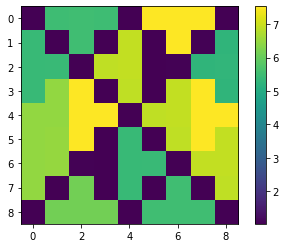

In [18]:
import matplotlib.pyplot as plt

plt.imshow(sudoku.calculate_restriction().sum(-1))
plt.colorbar()
plt.show()